<a href="https://colab.research.google.com/github/hfwalvir/Python-PortfolioProjects/blob/main/Sentiment_analysis_(AIRPLANE_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tweets = pd.read_csv("/content/sample_data/Tweets.csv")

In [ ]:
tweets.head(n=5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#Code for fixing plot size
plt_size = plt.rcParams["figure.figsize"]
print(plt_size[0])
print(plt_size[1])

plt_size[0] = 8
plt_size[1] = 6
plt.rcParams["figure.figsize"] = plt_size


6.4
4.8


# **EXPLORING** **DATA**

<Axes: ylabel='count'>

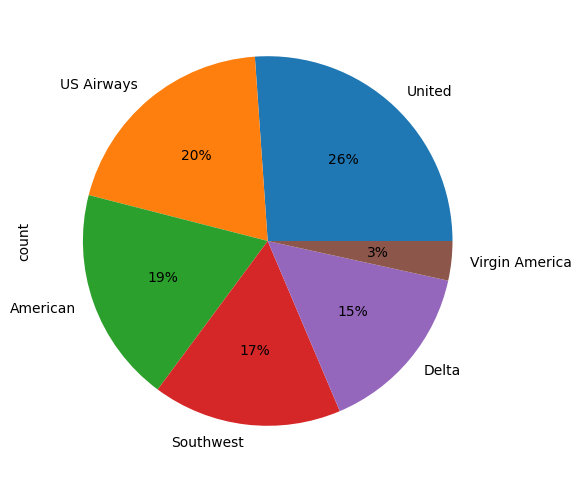

In [ ]:
tweets.airline.value_counts().plot(kind='pie',autopct='%1.0f%%')


<Axes: xlabel='airline'>

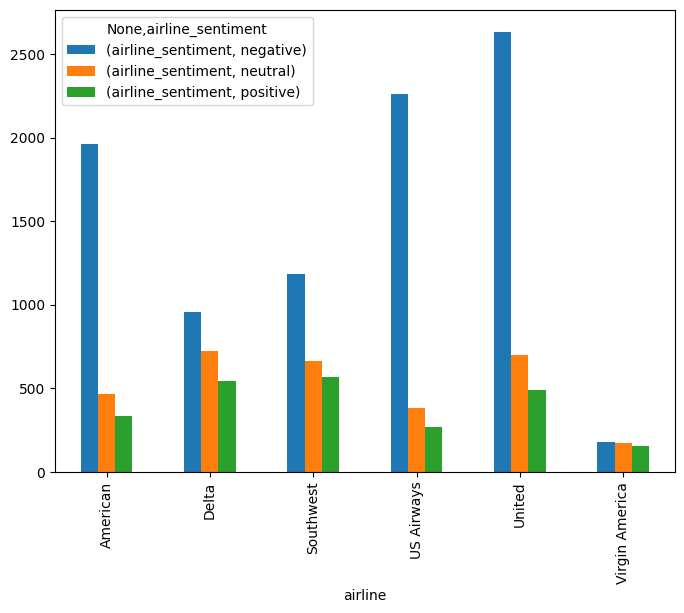

In [ ]:
airline_sentiments  = tweets.groupby(['airline','airline_sentiment']).agg({'airline_sentiment':'count'}).unstack()
airline_sentiments.plot(kind='bar')

<Axes: ylabel='count'>

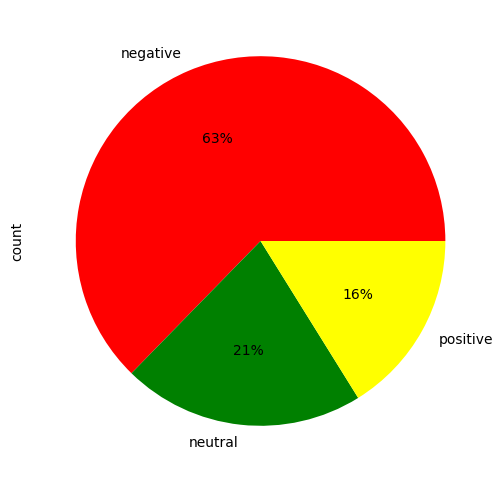

In [ ]:
#Sentiment porportions
tweets.airline_sentiment.value_counts().plot(kind='pie',autopct = '%1.0f%%',colors=["red","green","yellow"])

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

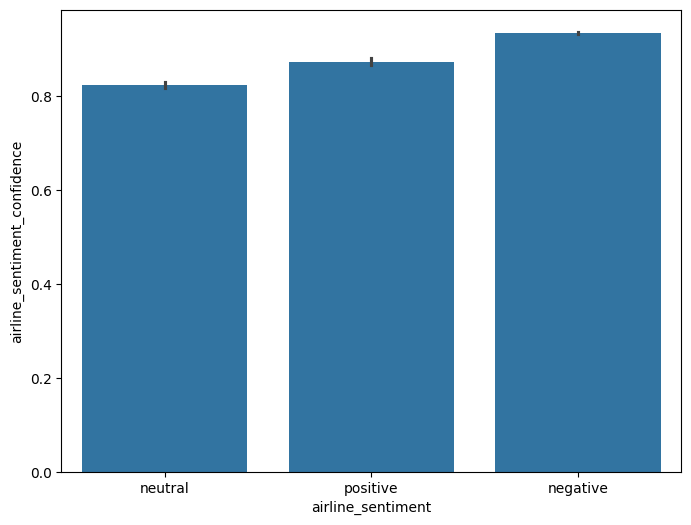

In [ ]:
import seaborn as sns
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data=tweets)

# **DATA** **CLEANING**

In [ ]:
features  = tweets.iloc[:,10].values #Tweets
labels = tweets.iloc[:,1].values #Sentiments

In [ ]:
processed_features = []
for sentence in range(0,len(features)):
  #Remove all special characters
  processed_feature = re.sub('r\W',' ',str(features[sentence]))
  #Remove all single characters
  processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ',processed_feature)
  #Removing single characters from the start
  processed_feature = re.sub(r'\^[a-zA-Z]\s+',' ' ,processed_feature)
  #Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+',' ' ,processed_feature,flags=re.I)
  #Removing prefixed 'b'
  processed_feature = re.sub(r'^\b\s+',' ' ,processed_feature,flags=re.I)

  #Converting into lower case
  processed_feature = processed_feature.lower()
  processed_features.append(processed_feature)


# **CONVERTING** **TEXT TO NUMERIC DATA**

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#TF INVERSE DOCUMENT FREQUENCY APPROACH
#Tf = freq of word in the doc/(totoal words in the doc)
#IDF = log(total number of docs)/ (Number of docs containing the word)
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2500, min_df = 7,max_df = 0.8, stop_words = stopwords.words('english')) #only 2500 most frequently occuring words, and 7 documents minimum,maximum occuring in 80% of all documents

processed_features =vectorizer.fit_transform(processed_features).toarray()

# **DIVIDING DATA INTO TRAINING AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features,labels,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier(n_estimators = 200,random_state=0)
classifer.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
predictions = classifer.predict(X_test)

In [ ]:
#Printing some of the predicted data
import numpy as np
#Printing some of the predicted data
# Assuming you have y_test, X_test, and predictions as numpy arrays
y_test_subset = y_test[:5]
X_test_subset = X_test[:5]
predictions_subset = predictions[:5]

# Concatenate y_test_subset and X_test_subset along the column axis
results_array = np.column_stack((y_test_subset, X_test_subset))

# Insert predictions_subset as a new column at index 1
results_array = np.insert(results_array, 1, predictions_subset, axis=1)

print(results_array)

[['negative' 'negative' 0.0 ... 0.0 0.0 0.0]
 ['negative' 'negative' 0.0 ... 0.0 0.0 0.0]
 ['negative' 'negative' 0.0 ... 0.0 0.0 0.0]
 ['negative' 'negative' 0.0 ... 0.0 0.0 0.0]
 ['negative' 'negative' 0.0 ... 0.0 0.0 0.0]]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print('accuracy_score',accuracy_score(y_test,predictions))

[[1723  105   42]
 [ 329  242   43]
 [ 143   62  239]]
accuracy_score 0.7527322404371585


# **WHAT DOES TF AND IDF DO EXACTLY**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
docs = ["The house has a tiny little mouse",
        "the cat saw the mouse",
        "the mouse ran away from the house"]


In [ ]:
cv = CountVectorizer() #removes all the single characters and stop words
word_count = cv.fit_transform(docs)

In [ ]:
word_count.shape #3 sentences and 11 unique words

(3, 11)

In [ ]:
#IDF
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf = True)
tfidf_transformer.fit(word_count)

TfidfTransformer()

In [ ]:
df_idf = pd.DataFrame(tfidf_transformer.idf_,index = cv.get_feature_names_out(),columns = ['Idf_weights'])
df_idf.sort_values(by=['Idf_weights'])

,Idf_weights
mouse,1.000000
the,1.000000
house,1.287682
away,1.693147
cat,1.693147
from,1.693147
has,1.693147
little,1.693147
ran,1.693147
saw,1.693147


In [ ]:
#count matrix
count_vector = cv.transform(docs)
#tf-idf scores
tf_idf_vector = tfidf_transformer.transform(count_vector) #tf weights are multipled with the term frequency

In [ ]:
feature_names = cv.get_feature_names_out()
first_sentence_vector = tf_idf_vector[0]
df =pd.DataFrame(first_sentence_vector.T.todense(),index = feature_names,columns=['tfidf'])
df.sort_values(by=["tfidf"],ascending=False) #a has been removed (single characters), stop words have been removed and only unique words are there)

,tfidf
has,0.483591
little,0.483591
tiny,0.483591
house,0.367784
mouse,0.285617
the,0.285617
away,0.000000
cat,0.000000
from,0.000000
ran,0.000000


In [ ]:
#TIme to apply tfidf vectorizer (for lesser steps)
#word counts, idf and tf-idf valuea all are inclusive in this vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#settings that you use for count vectorizer will be replaced with this :
tfidf_vectorizer = TfidfVectorizer(use_idf = True)
#sending all the documents into this vectorizer
tfidf_vectorizer_vector = tfidf_vectorizer.fit_transform(docs)

In [ ]:
#getting the first vector out (first sentence)
first_vector_tfidfvector = tfidf_vectorizer_vector[0]
#place tf-idf values in pandas
df = pd.DataFrame(first_vector_tfidfvector.T.todense(),index= tfidf_vectorizer.get_feature_names_out(),columns=["tfidf"])
df.sort_values(by=['tfidf'],ascending=False)

,tfidf
has,0.483591
little,0.483591
tiny,0.483591
house,0.367784
mouse,0.285617
the,0.285617
away,0.000000
cat,0.000000
from,0.000000
ran,0.000000


## **COUNT VECTORIZER**